<a href="https://colab.research.google.com/github/sehan25/ESAA-2022-2/blob/main/Assignment/1121-Python-machine-learning-ch09-Surprise-package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **08. 파이썬 추천 시스템 패키지 - Surprise**

### Surprise 패키지 소개
- 파이썬 기반의 추천 시스템 구축을 위한 전용 패키지 중의 하나
- 파이썬 기반에서 사이킷런과 유사한 API와 프레임워크를 제공함

### Surprise를 이용한 추천 시스템 구축
- 예제는 추천 데이터를 학습용과 테스트용 데이터 세트로 분리한 뒤 SVD 행렬 분해를 통한 잠재 요인 협업 필터링을 수행함

In [1]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.7 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1634012 sha256=f5fa6d3939597e2941ada038ed6dd9886457c027264e64c769a83bffee34dbd9
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [2]:
from surprise import SVD
from surprise import Dataset 
from surprise import accuracy 
from surprise.model_selection import train_test_split

- Surprise에서 데이터 로딩은 Dataset 클래스를 이용해서만 가능함
- Surprise는 Movie Lens 데이터 세트의 사용자-영화 평점 데이터 포맷과 같이 userId(사용자 ID), movieId(영화 ID), rating(평점)과 같은 주요 데이터가 로우(Row) 레벨 형태로 돼 있는 포맷의 데이터만 처리함
- Surprise는 무비렌즈(MovieLens) 사이트에서 제공하는 과거 버전의 데이터 세트를 가져오는 API를 제공함
    - Surprise Dataset 클래스의 `load_bulletin()`은 무비렌즈 사이트에서 제공하는 과거 버전 데이터 세트인 'ml-100k'(10만 개 평점 데이터) 또는 'ml-1m'(100만 개 평점 데이터) 데이터를 아카이브 사이트로부터 내려받아 로컬 디렉터리에 저장한 뒤 데이터를 로딩함


In [ ]:
data = Dataset.load_builtin('ml-100k')
# 수행 시마다 동일하게 데이터를 분할하기 위해 random_state 값 부여
trainset, testset = train_test_split(data, test_size=.25, random_state=0) 

- Surprise는 자체적으로 로우 레벨의 데이터를 칼럼 레벨의 데이터로 변경하므로 원본인 로우 레벨의 사용자-아이템 평점 데이터를 데이터 세트로 적용해야 함
- SVD로 잠재 요인 협업 필터링 수행

In [ ]:
algo = SVD()
algo.fit(trainset) 

- 학습된 추천 알고리즘을 기반으로 테스트 데이터 세트에 대해 추천을 수행
    - 추천을 예측하는 메서드는 `test()`와 `predict()`
        - `test()`: 사용자-아이템 평점 데이터 세트 전체에 대해서 추천을 예측하는 메서드
        - `predict()`: 개별 사용자와 영화에 대한 추천 평점을 반환

In [ ]:
predictions = algo.test(testset)
print('prediction type :',type(predictions), ' size:',len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]

&rarr; 호출 결과로 반환된 리스트 객체는 25,000개의 Prediction 객체를 내부에 가지고 있음  
- Prediction 객체는 Surprise 패키지에서 제공하는 데이터 타입이며, 개별 사용자 아이디(uid), 영화(또는 아이템) 아이디(id)와 실제 평점(r_ui) 정보에 기반해 Surprise의 추천 예측 평점(est) 데이터를 튜플 형태로 가지고 있음
- details 속성은 내부 처리 시 추천 예측을 할 수 없는 경우에 로그용으로 데이터를 남기는 데 사용됨
    - 'was_impossible'이 True이면 예측값을 생성할 수 없는 데이터라는 의미. 여기서는 모두 False임
- 리스트 객체 내에 내포된 Prediction 객체의 uid, iid, r_ui, est 등의 속성에 접근하려면 객체명 uid와 같은 형식으로 가능함
- 3개의 Prediction 객체에서 uid, iid, est 속성을 추출한 예제


In [ ]:
[ (pred.uid, pred.iid, pred.est) for pred in predictions[:3] ]

- `predict()`를 이용해 추천 예측
    - 인자로 개별 사용자 아이디, 아이템 아이디를 입력하면 추천 예측 평점을 포함한 정보를 반환


In [ ]:
# 사용자 아이디, 아이템 아이디는 문자열로 입력해야 함
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid)
print(pred)

&rarr; 추천 예측 평점을 est로 반환함

- `test()` 메서드는 입력 데이터 세트의 모든 사용자와 아이템 아이디에 대해서 `predict()`를 반복적으로 수행한 결과라고 생각하면 좀 더 이해하기 쉬울 것
- 테스트 데이터 세트를 이용해 추천 예측 평점과 실제 평점과의 차이를 평가
- accuracy 모듈은 RMSE, MSE 등의 방법으로 추천 시스템의 성능 평가 정보를 제공함
- RMSE 평가 결과 확인

In [ ]:
accuracy.rmse(predictions)

### Surprise 주요 모듈 소개

#### Dataset
- Surprise는 user_id(사용자 아이디), item_id(아이템 아이디), rating(평점) 데이터가 로우 레벨로 된 데이터 세트만 적용할 수 있음
    - `Dataset.load_builtin(name='ml-100k')`
    - `Dataset.load_from_file(file_path, reader)`
    - `Dataset.load_from_df(df, reader)`

#### OS 파일 데이터를 Surprise 데이터 세트로 로딩
- Surprise에 OS 파일을 로딩할 때의 주의할 점은 로딩되는 데이터 파일에 칼럼명을 가지는 헤더 문자열이 있어서는 안 된다는 것임

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd

ratings = pd.read_csv('/content/drive/MyDrive/ESAA/data/ml-latest-small/ratings.csv')
# ratings_noh.csv 파일로 unload 시 index 와 header를 모두 제거한 새로운 파일 생성.  
ratings.to_csv('/content/drive/MyDrive/ESAA/data/ml-latest-small/ratings_noh.csv', index=False, header=False)

- ratings_noh.csv를 DataSet 모듈의 `load_from_file()`을 이용해 DataSet로 로드
    - `Dataset.load_from_file()`을 적용하기 전에 Reader 클래스를 이용해 데이터 파일의 파싱 포맷을 정의해야 함
- Reader 클래스는 로딩될 ratings_noh.csv 파일의 파싱 정보를 알려주기 위해 사용됨

In [15]:
from surprise import Reader

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5,5))
data=Dataset.load_from_file('/content/drive/MyDrive/ESAA/data/ml-latest-small/ratings_noh.csv', reader=reader)

- Surprise 데이터 세트는 기본적으로 무비렌즈 데이터 형식을 따르므로 무비렌즈 데이터 형식이 아닌 다른 OS 파일의 경우 Reader 클래스를 먼저 설정해야 함
- Reader 클래스의 주요 생성 파라미터
    - `line_format`(string): 칼럼을 순서대로 나열함. 입력된 문자열을 공백으로 분리해 칼럼으로 인식함
    - `sep`(char): 칼럼을 분리하는 분리자이며, 디폴트는 '\t'임
    - `rating_scale`(tuple, optional): 평점 값의 최소 ~ 최대 평점을 설정함 디폴트는 (1,5)임
- SVD 행렬 분해 기법을 이용해 추천을 예측 후 예측 평점과 실제 평점 데이터를 RMSE로 평가

In [16]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

# 수행 시마다 동일한 결과 도출을 위해 random_state 설정
algo = SVD(n_factors=50, random_state=0)

# 학습 데이터 세트로 학습하고 나서 테스트 데이터 세트로 평점 예측 후 RMSE 평가
algo.fit(trainset) 
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

#### 판다스 DataFrame에서 Surprise 데이터 세트로 로딩
- `Dataset.load_from_df()`를 이용하면 판다스의 DataFrame에서도 Surprise 데이터 세트로 로딩할 수 있음
- 주의할 점은 DataFrame 역시 사용자 아이디, 아이템 아이디, 평점 칼럼 순서를 지켜야 한다는 것임

In [17]:
import pandas as pd
from surprise import Reader, Dataset

ratings = pd.read_csv('/content/drive/MyDrive/ESAA/data/ml-latest-small/ratings.csv') 
reader = Reader(rating_scale=(0.5, 5.0))

# ratings DataFrame에서 칼럼은 사용자 아이디, 아이템 아이디, 평점 순서를 지켜야 함
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset) 
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

### Surprise 추천 알고리즘 클래스
- Surprise에서 추천 예측을 위해 자주 사용되는 추천 알고리즘 클래스
    - SVD: 행렬 분해를 통한 잠재 요인 협업 필터링을 위한 SVD 알고리즘
    - KNNBasic: 최근 이웃 협업 필터링을 위한 KNN 알고리즘
    - BaselineOnly: 사용자 Bias와 아이템 Bias를 감안한 SGD 베이스라인 알고리즘
- SVD 클래스의 입력 파라미터는 주로 n_factors와 n_epochs의 값을 변경해 튜닝할 수 있으나 튜닝 효과는 크지 않음. biased의 경우는 큰 이유가 없는 한 디폴트인 True로 설정을 유지하는 것이 좋음
    - `n_factors`: 잠재 요인 K의 개수, 디폴트는 100, 커질수록 정확도가 높아질 수 있으나 과적합 문제가 발생할 수 있음
    - `n_epochs`: SGD(Stochastic Gradient Descent) 수행 시 반복 횟수. 디폴트는 20
    - `biased` (bool): 베이스라인 사용자 편향 적용 여부이며, 디폴트는 True임

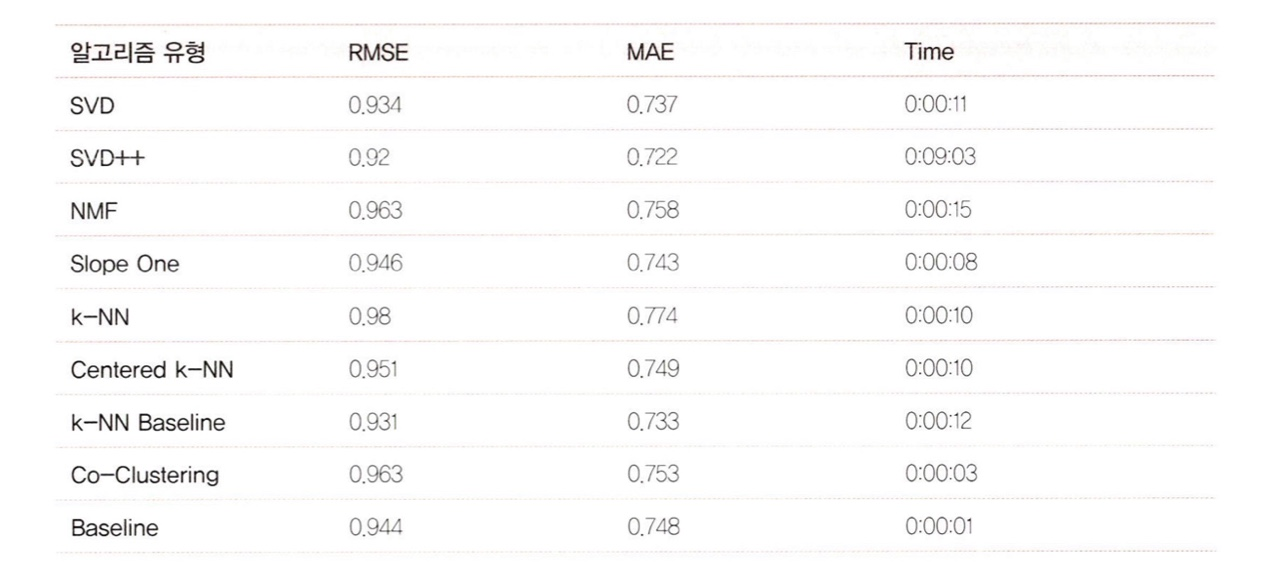
- Baseline: 각 개인이 평점을 부여하는 성향을 반영해 평점을 계산하는 방식

### 베이스라인 평점
- 베이스라인 평점(Baseline Rating): 한 개인의 성향을 반영해 아이템 평가에 편향성(bias) 요소를 반영하여 평점을 부과하는 것
- 보통 베이스라인 평점은 전체 평균 평점+ 사용자 편향 점수 + 아이템 편향 점수 공식으로 계산됨
    - 전체 평균 평점 = 모든 사용자의 아이템에 대한 평점을 평균한 값
    - 사용자 편향 점수 = 사용자별 아이템 평점 평균 값 - 전체 평균 평점
    - 아이템 편향 점수 = 아이템별 평점 평균 값 - 전체 평균 평점

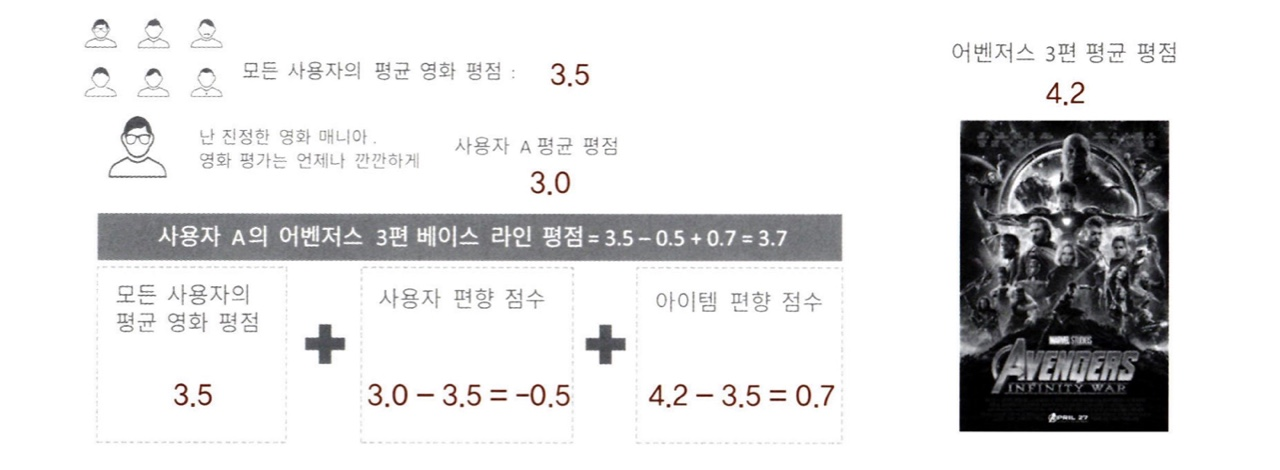

### 교차 검증과 하이퍼 파라미터 튜닝
- Surprise는 교차 검증과 하이퍼 파라미터 튜닝을 위해 사이킷런과 유사한 `cross_validate()`와 GridSearchCV 클래스를 제공함
- 다음 예제에서는 `cross_validate()`를 이용해 ratings.csv를 DataFrame으로 로딩한 데이터를 5개의 학습/검증 폴드 데이터 세트로 분리해 교차 검증을 수행하고 RMSE, MAE로 성능 평가를 진행함

In [18]:
from surprise.model_selection import cross_validate 

# 판다스 DataFrame에서 Surprise 데이터 세트로 데이터 로딩 
ratings = pd.read_csv('/content/drive/MyDrive/ESAA/data/ml-latest-small/ratings.csv') # reading data in pandas df
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

algo = SVD(random_state=0) 
cross_validate(algo, data, measures=['RMSE','MAE'], cv=5, verbose=True) 

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8772  0.8642  0.8762  0.8703  0.8779  0.8731  0.0052  
MAE (testset)     0.6760  0.6634  0.6726  0.6700  0.6748  0.6714  0.0045  
Fit time          5.97    6.06    5.86    7.43    6.02    6.27    0.58    
Test time         0.31    0.15    0.28    0.41    0.17    0.27    0.09    


{'test_rmse': array([0.87715836, 0.8641703 , 0.87615702, 0.87032125, 0.87789506]),
 'test_mae': array([0.67601383, 0.66344454, 0.67262851, 0.67001856, 0.67484466]),
 'fit_time': (5.973086595535278,
  6.05864953994751,
  5.859307050704956,
  7.426902532577515,
  6.018416881561279),
 'test_time': (0.3097419738769531,
  0.1515977382659912,
  0.281949520111084,
  0.41097211837768555,
  0.17302250862121582)}

- `cross_validate()`는 위의 출력 결과와 같이 폴드별 성능 평가 수치와 전체 폴드의 평균 성능 평가 수치를 함께 보여줌
- Surprise의 GridSearchCV도 사이킷런의 GridSearchCV와 유사하게 교차 검증을 통한 하이퍼 파라미터 최적화를 수행함
    - 하이퍼 파라미터 최적화는 알고리즘 유형에 따라 다를 수 있지만, SVD의 경우 주로 점진적 하강 방식(Stochastic Gradient Descent)의 반복 횟수를 지정하는 n_epochs 와 SVD의 잠재 요인 K의 크기를 지정하는 n_factors를 튜닝함

In [19]:
from surprise.model_selection import GridSearchCV

# 최적화할 파라미터를 딕셔너리 형태로 지정
param_grid = {'n_epochs': [20, 40, 60], 'n_factors': [50, 100, 200]}

# CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse 로 수행하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse','mae'], cv=3)
gs.fit(data)

# 최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8776881920329672
{'n_epochs': 20, 'n_factors': 50}


### Surprise를 이용한 개인화 영화 추천 시스템 구축
- Surprise를 이용해 잠재 요인 협업 필터링 기반의 개인화된 영화 추천을 구현해보기
    - Surprise 패키지로 학습된 추천 알고리즘을 기반으로 특정 사용자가 아직 평점을 매기지 않은(관람하지 않은) 영화 중에서 개인 취향에 가장 적절한 영화를 추천해보기
- ratings.csv 데이터를 학습 데이터와 테스트 데이터로 분리하지 않고 전체를 학습 데이터로 사용함

In [20]:
# 다음 코드는 train_test_split()으로 분리되지 않는 데이터 세트에 fit()을 호출하여 오류를 발생함
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
algo = SVD(n_factors=50, random_state=0)
algo.fit(data)

AttributeError: ignored

- 데이터 세트 전체를 학습 데이터로 사용하려면 DatasetAutoFolds 클래스를 이용하면 됨
    - DatasetAutoFolds 객체를 생성한 뒤에 `build_full_trainset()` 메서드를 호출하면 전체 데이터를 학습 데이터 세트로 만들 수 있음

In [21]:
from surprise.dataset import DatasetAutoFolds

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5,5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성
data_folds = DatasetAutoFolds(ratings_file='/content/drive/MyDrive/ESAA/data/ml-latest-small/ratings_noh.csv', reader=reader)

# 전체 데이터를 학습데이터로 생성함 
trainset = data_folds.build_full_trainset()

- SVD를 이용해 학습을 수행

In [22]:
algo = SVD(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

- 간단하게 Surprise 패키지의 API를 이용해 예제를 수행하기 위해 userId 9가 아직 평점을 매기지 않은 영화를 movieId 42로 선정한 뒤 예측 평점을 계산

In [23]:
# 영화에 대한 상세 속성 정보 DataFrame 로딩
movies = pd.read_csv('/content/drive/MyDrive/ESAA/data/ml-latest-small/movies.csv')

# userId=9 의 movieId 데이터 추출해 movieId=42 데이터가 있는지 확인
movieIds = ratings[ratings['userId']==9]['movieId']
if movieIds[movieIds==42].count() == 0:
    print('사용자 아이디 9는 영화 아이디 42의 평점 없음')

print(movies[movies['movieId']==42])

사용자 아이디 9는 영화 아이디 42의 평점 없음
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama


- movield 42인 영화에 대해서 userId 9 사용자의 추천 예상 평점은 `predict()` 메서드를 이용하면 됨
    - userId와 movield 값을 입력해주면 됨(문자열 값)


In [24]:
uid = str(9)
iid = str(42)

pred = algo.predict(uid, iid, verbose=True)

user: 9          item: 42         r_ui = None   est = 3.13   {'was_impossible': False}


- 사용자가 평점을 매기지 않은 전체 영화를 추출한 뒤에 예측 평점 순으로 영화를 추천
- 먼저 추천 대상이 되는 영화 추출
- 새롭게 `get_unseen_surprise()` 함수를 만들고 이를 이용해 아이디 9인 사용자가 아직 평점을 매기지 않은 영화 정보 반환

In [25]:
def get_unseen_surprise(ratings, movies, userId):
    # 입력값으로 들어온 userId에 해당하는 사용자가 평점을 매긴 모든 영화를 리스트로 생성
    seen_movies = ratings[ratings['userId']== userId]['movieId'].tolist()
    
    # 모든 영화의 movieId를 리스트로 생성
    total_movies = movies['movieId'].tolist()
    
    # 모든 영화들의 movieId 중 이미 평점을 매긴 영화의 movieId를 제외한 후 리스트로 생성
    unseen_movies= [movie for movie in total_movies if movie not in seen_movies]
    print('평점 매긴 영화수:',len(seen_movies), '추천대상 영화수:',len(unseen_movies),
          '전체 영화수:',len(total_movies))
    
    return unseen_movies

unseen_movies = get_unseen_surprise(ratings, movies, 9)

평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742


- 추천 대상 영화 중 앞에서 학습된 추천 알고리즘 클래스인 SVD를 이용해 높은 예측 평점을 가진 순으로 영화 추천
- 이를 위해 `recomm_movie_by_surprise()` 함수 새롭게 생성
    - 인자로 학습이 완료된 추천 알고리즘 객체, 추천 대상 사용자 아이디 추천 대상 영화의 리스트 객체, 추천 상위 N개 개수를 받음

In [26]:
def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):

    # 알고리즘 객체의 predict() 메서드를 평점이 없는 영화에 반복 수행한 후 결과를 list 객체로 저장
    predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]
    
    # predictions list 객체는 surprise의 Predictions 객체를 원소로 가지고 있음
    # [Prediction(uid='9', iid='1', est=3.69), Prediction(uid='9', iid='2', est=2.98),,,,]

    # 이를 est 값으로 정렬하기 위해서 아래의 sortkey_est 함수를 정의함
    # sortkey_est 함수는 list 객체의 sort() 함수의 키 값으로 사용되어 정렬 수행
    def sortkey_est(pred):
        return pred.est
    
    # sortkey_est() 반환값의 내림 차순으로 정렬 수행하고 top_n개의 최상위 값 추출
    predictions.sort(key=sortkey_est, reverse=True)
    top_predictions= predictions[:top_n]
    
    # top_n으로 추출된 영화의 정보 추출. 영화 아이디, 추천 예상 평점, 제목 추출
    top_movie_ids = [int(pred.iid) for pred in top_predictions]
    top_movie_rating = [pred.est for pred in top_predictions]
    top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']
    top_movie_preds = [(id, title, rating) for id, title, rating in
                       zip(top_movie_ids, top_movie_titles, top_movie_rating)]
    
    return top_movie_preds

unseen_movies = get_unseen_surprise(ratings, movies, 9)
top_movie_preds = recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)

print('##### Top-10 추천 영화 리스트 #####')
for top_movie in top_movie_preds:
    print(top_movie[1], ":", top_movie[2])

평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742
##### Top-10 추천 영화 리스트 #####
Usual Suspects, The (1995) : 4.306302135700814
Star Wars: Episode IV - A New Hope (1977) : 4.281663842987387
Pulp Fiction (1994) : 4.278152632122759
Silence of the Lambs, The (1991) : 4.226073566460876
Godfather, The (1972) : 4.1918097904381995
Streetcar Named Desire, A (1951) : 4.154746591122658
Star Wars: Episode V - The Empire Strikes Back (1980) : 4.122016128534504
Star Wars: Episode VI - Return of the Jedi (1983) : 4.108009609093436
Goodfellas (1990) : 4.083464936588478
Glory (1989) : 4.07887165526957
